Pesos dos neurônios após o treinamento (2 grupos):
[[-0.59093802  0.45016725  0.04141811]
 [ 0.53280978 -0.58116563  1.        ]]


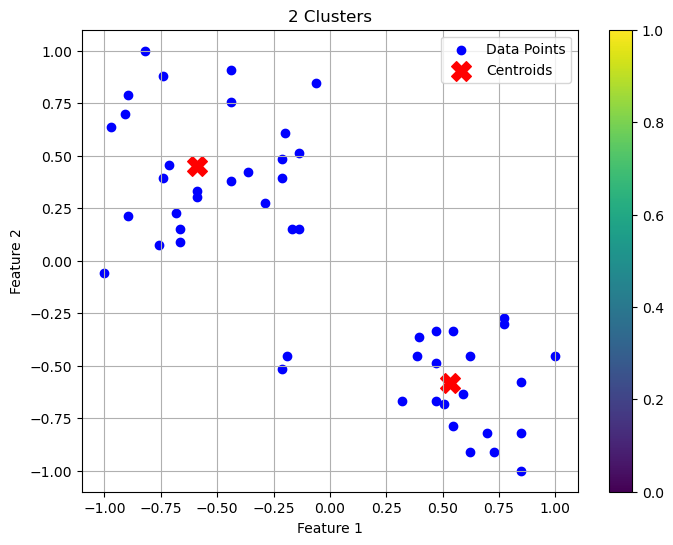

Pesos dos neurônios após o treinamento (3 grupos):
[[-3.99566310e-01 -2.07169239e-01  9.99999932e-01]
 [ 6.18528535e-01 -6.05971409e-01  1.00000000e+00]
 [-5.51941061e-01  4.77342710e-01  3.54582723e-48]]


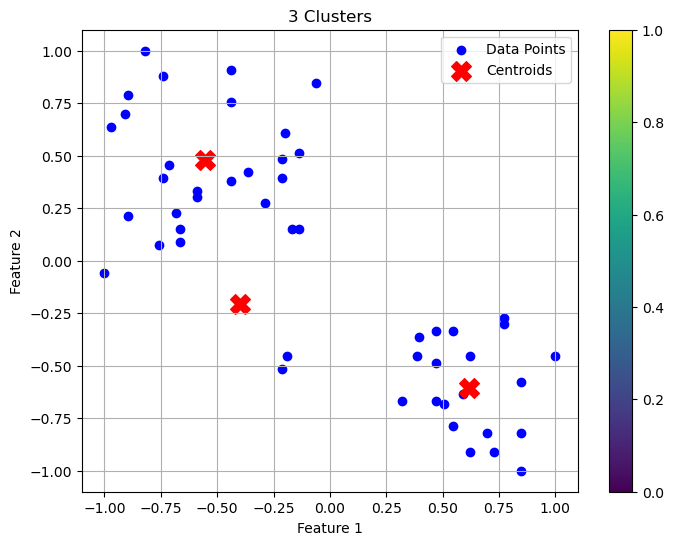

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class VectorQuantificacao:
    def __init__(self, input_size, num_neurons, learning_rate=0.1, num_epochs=100):
        self.input_size = input_size
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Inicialização dos pesos dos neurônios
        self.weights = np.random.rand(num_neurons, input_size)
      
        
    def train(self, data):
        for epoch in range(self.num_epochs):
            for x in data:
                # Encontre o neurônio vencedor (o mais próximo do ponto de entrada)
                winner_index = self._find_winner(x)

                # Atualize os pesos do neurônio vencedor
                self.weights[winner_index] += self.learning_rate * (x - self.weights[winner_index])
                
    def _find_winner(self, x):
        # Calcule as distâncias entre o ponto de entrada e os pesos de todos os neurônios
        distances = np.linalg.norm(self.weights - x, axis=1)
        
        # Encontre o índice do neurônio com a menor distância (o vencedor)
        winner_index = np.argmin(distances)
        return winner_index

def plot_clusters(data, centroids, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.colorbar()
    plt.show()

# Carrega o conjunto de dados de entrada de um arquivo .dat
def load_data(file_path):
    data = np.loadtxt(file_path)
    return data

# Define o caminho para o arquivo de dados
file_path_2_clusters = r'D:\UBI Courses\Inteligencia Computacional\f1\exemplo2.dat'
file_path_3_clusters = r'D:\UBI Courses\Inteligencia Computacional\f1\exemplo2.dat'

# Carrega os conjuntos de dados de entrada
data_2_clusters = load_data(file_path_2_clusters)
data_3_clusters = load_data(file_path_3_clusters)

# Cria e treina o vetor quantizado com 2 grupos
vq_2_clusters = VectorQuantificacao(input_size=3, num_neurons=2, learning_rate=0.1, num_epochs=100)
vq_2_clusters.train(data_2_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (2 grupos):")
print(vq_2_clusters.weights)

# Visualiza os resultados com Matplotlib
plot_clusters(data_2_clusters, vq_2_clusters.weights, '2 Clusters')

# Cria e treina o vetor quantizado com 3 grupos
vq_3_clusters = VectorQuantificacao(input_size=3, num_neurons=3, learning_rate=0.05, num_epochs=100)
vq_3_clusters.train(data_3_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (3 grupos):")
print(vq_3_clusters.weights)

# Visualiza os resultados com Matplotlib
plot_clusters(data_3_clusters, vq_3_clusters.weights, '3 Clusters')


